In [24]:
import seaborn as sns

from scoresbibm.utils.data_utils import query, get_summary_df, load_model
from scoresbibm.utils.plot import plot_metric_by_num_simulations, use_style,multi_plot

import matplotlib.pyplot as plt

import logging
logging.getLogger('matplotlib.font_manager').disabled = True


In [25]:
DEFAULT_COLORS = {"npe": "#154c79", "nle": "#1e81b0", "nre": "#76b5c5", "nspe": "#fdae61", "score_transformer": "#d73027", "score_transformer_posterior": "#8b27d7", "score_transformer_directed": "#f25d1d","score_transformer_min_graphical": "#f25d1d", "score_transformer_undirected": "#911c1c", "score_transformer_graphical": "#911c1c"}
figsize_per_row = 1.75
figsize_per_col = 2.


In [26]:
PATH = "../../../results/bm_time_steps"

In [27]:
df_time_steps_gl= query(PATH,metric="c2st_posterior", method="score_transformer", task="gaussian_linear",method_sde_name="vesde" )
df_time_steps_gl["num_steps"] =  df_time_steps_gl["cfg"].apply(lambda x: eval(x)["method"]["posterior"]["num_steps"])

In [28]:
query(PATH)

method              task  num_simulations  seed  \
0               score_transformer  gaussian_mixture           100000     0   
1               score_transformer         two_moons           100000     0   
2               score_transformer   gaussian_linear           100000     0   
3               score_transformer              slcp           100000     0   
4               score_transformer  gaussian_mixture           100000     0   
..                            ...               ...              ...   ...   
199  score_transformer_undirected   gaussian_linear           100000     0   
200  score_transformer_undirected   gaussian_linear           100000     0   
201  score_transformer_undirected   gaussian_linear           100000     0   
202  score_transformer_undirected   gaussian_linear           100000     0   
203  score_transformer_undirected   gaussian_linear           100000     0   

     model_id          metric     value   time_train  time_eval  \
0           0            none       NaN   858.536097        NaN   
1           1            none       NaN   902.723094        NaN   
2           2            none       NaN  1632.170444        NaN   
3           3            none       NaN  1323.480775        NaN   
4           4            none       NaN  1011.092702        NaN   
..        ...             ...       ...          ...        ...   
199        22  c2st_posterior  0.498735          NaN  17.951457   
200        22  c2st_posterior  0.501675          NaN  21.482494   
201        22  c2st_posterior  0.500725          NaN  27.398926   
202        22  c2st_posterior  0.500710          NaN  49.371121   
203        22  c2st_posterior  0.499770          NaN  50.722500   

                                                   cfg  
0    {'name': 'bm_time_steps', 'seed': 0, 'model_id...  
1    {'name': 'bm_time_steps', 'seed': 0, 'model_id...  
2    {'name': 'bm_time_steps', 'seed': 0, 'model_id...  
3    {'name': 'bm_time_steps', 'seed': 0, 'model_id...  
4    {'name': 'bm_time_steps', 'seed': 0, 'model_id...  
..                                                 ...  
199  {'name': 'bm_time_steps', 'seed': 0, 'model_id...  
200  {'name': 'bm_time_steps', 'seed': 0, 'model_id...  
201  {'name': 'bm_time_steps', 'seed': 0, 'model_id...  
202  {'name': 'bm_time_steps', 'seed': 0, 'model_id...  
203  {'name': 'bm_time_steps', 'seed': 0, 'model_id...  

[204 rows x 10 columns]

In [29]:
df_time_steps_gm= query(PATH, metric="c2st_posterior", method="score_transformer", task="gaussian_mixture",method_sde_name="vesde" )
df_time_steps_gm["num_steps"] =  df_time_steps_gm["cfg"].apply(lambda x: eval(x)["method"]["posterior"]["num_steps"])

In [30]:
df_time_steps_tm= query(PATH, metric="c2st_posterior", method="score_transformer", task="two_moons",method_sde_name="vesde" )
df_time_steps_tm["num_steps"] =  df_time_steps_tm["cfg"].apply(lambda x: eval(x)["method"]["posterior"]["num_steps"])

In [31]:
df_time_steps_slcp= query(PATH, metric="c2st_posterior", method="score_transformer", task="slcp",method_sde_name="vesde" )
df_time_steps_slcp["num_steps"] =  df_time_steps_slcp["cfg"].apply(lambda x: eval(x)["method"]["posterior"]["num_steps"])

In [32]:
df_time_steps_gl2= query(PATH,metric="c2st_posterior", method="score_transformer", task="gaussian_linear",method_sde_name="vpsde" )
df_time_steps_gl2["num_steps"] =  df_time_steps_gl2["cfg"].apply(lambda x: eval(x)["method"]["posterior"]["num_steps"])

In [33]:
df_time_steps_gm2= query(PATH, metric="c2st_posterior", method="score_transformer", task="gaussian_mixture",method_sde_name="vpsde" )
df_time_steps_gm2["num_steps"] =  df_time_steps_gm2["cfg"].apply(lambda x: eval(x)["method"]["posterior"]["num_steps"])

In [34]:
df_time_steps_tm2= query(PATH, metric="c2st_posterior", method="score_transformer", task="two_moons",method_sde_name="vpsde" )
df_time_steps_tm2["num_steps"] =  df_time_steps_tm2["cfg"].apply(lambda x: eval(x)["method"]["posterior"]["num_steps"])

In [35]:
df_time_steps_slcp2= query(PATH, metric="c2st_posterior", method="score_transformer", task="slcp",method_sde_name="vpsde" )
df_time_steps_slcp2["num_steps"] =  df_time_steps_slcp2["cfg"].apply(lambda x: eval(x)["method"]["posterior"]["num_steps"])

In [36]:
df_time_steps_gl = df_time_steps_gl.sort_values(by="method")
df_time_steps_gl2 = df_time_steps_gl2.sort_values(by="method")
df_time_steps_gm = df_time_steps_gm.sort_values(by="method")
df_time_steps_gm2 = df_time_steps_gm2.sort_values(by="method")
df_time_steps_tm = df_time_steps_tm.sort_values(by="method")
df_time_steps_tm2 = df_time_steps_tm2.sort_values(by="method")
df_time_steps_slcp = df_time_steps_slcp.sort_values(by="method")
df_time_steps_slcp2 = df_time_steps_slcp2.sort_values(by="method")

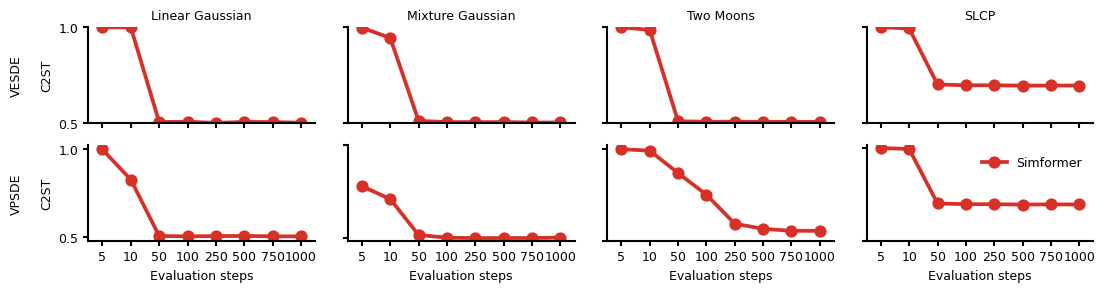

In [38]:
with use_style("pyloric"):
    fig, axes = plt.subplots(2,4, figsize=(12,3.))
    plt.subplots_adjust(wspace=10.,)

    sns.pointplot(data=df_time_steps_gl, x="num_steps", y="value", hue="method", ax=axes[0,0], palette=DEFAULT_COLORS, legend=False)
    sns.pointplot(data=df_time_steps_gm, x="num_steps", y="value", hue="method", ax=axes[0,1], palette=DEFAULT_COLORS, legend=False)
    sns.pointplot(data=df_time_steps_tm, x="num_steps", y="value", hue="method", ax=axes[0,2], palette=DEFAULT_COLORS, legend=False)
    sns.pointplot(data=df_time_steps_slcp, x="num_steps", y="value", hue="method", ax=axes[0,3], palette=DEFAULT_COLORS, legend=False)

    sns.pointplot(data=df_time_steps_gl2, x="num_steps", y="value", hue="method", ax=axes[1,0], palette=DEFAULT_COLORS, legend=False)
    sns.pointplot(data=df_time_steps_gm2, x="num_steps", y="value", hue="method", ax=axes[1,1], palette=DEFAULT_COLORS, legend=False)
    sns.pointplot(data=df_time_steps_tm2, x="num_steps", y="value", hue="method", ax=axes[1,2], palette=DEFAULT_COLORS, legend=False)
    sns.pointplot(data=df_time_steps_slcp, x="num_steps", y="value", hue="method", ax=axes[1,3], palette=DEFAULT_COLORS, legend=False)

    for i in range(4):
        axes[0,i].set_xlabel("")
        axes[0,i].set_ylim([0.5,1.])
        axes[1,i].set_yticks([0.5,1.])
        axes[0,i].set_yticks([0.5,1.])
        axes[1,i].set_xlabel("Evaluation steps")

        axes[0,i].set_xticklabels([])
        axes[0,i].set_ylabel("")
        axes[1,i].set_ylabel("")
        
        if i > 0:
            axes[0,i].set_yticklabels([])
            axes[1,i].set_yticklabels([])
            
    axes[0,0].set_title("Linear Gaussian")    
    axes[0,1].set_title("Mixture Gaussian")
    axes[0,2].set_title("Two Moons")
    axes[0,3].set_title("SLCP")
    axes[0,0].set_yticks([0.5,1.])
    axes[1,0].set_yticks([0.5,1.])
    axes[0,0].set_yticklabels([0.5,1.])
    axes[1,0].set_yticklabels([0.5,1.])
    axes[0,0].set_ylabel("VESDE\n\nC2ST", x=-1.)
    axes[1,0].set_ylabel("VPSDE\n\nC2ST", x=-1.)
    plt.legend(["Simformer"])
    fig.tight_layout()
    fig.savefig("time_steps.svg")
plt.show()